In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Generate synthetic hyperspectral data
np.random.seed(42)
num_samples = 1000
num_bands = 50

# Simulate "normal" spectra (normative group)
X_normal = np.random.rand(num_samples, num_bands)  # Random spectral inputs
y_normal = np.sin(X_normal.sum(axis=1)) + 0.1 * np.random.randn(num_samples)  # Simulated output

In [4]:
print(X_normal.shape)
print(y_normal.shape)

(1000, 50)
(1000,)


In [5]:
# Train-test split
split_idx = int(0.8 * num_samples)
X_train, X_test = X_normal[:split_idx], X_normal[split_idx:]
y_train, y_test = y_normal[:split_idx], y_normal[split_idx:]

# Train the normative model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [6]:
# Predict on the test set
y_pred = model.predict(X_test)

In [7]:
y_pred.shape

(200,)

In [9]:
# Calculate deviations
deviations = y_test - y_pred
deviations

array([-1.08018783,  0.89714665, -1.14329996, -0.95623844,  0.86053532,
       -0.63690954, -0.86991214,  0.29743045,  0.28088697, -0.11011211,
       -0.81998608,  0.9578642 ,  1.24898408, -0.01442344, -0.20305713,
        0.640295  , -0.20782771,  0.28747176, -0.96890161, -0.81645274,
       -1.37698685,  0.12933259, -0.61206608, -0.47926269,  0.24021524,
        0.4896837 , -0.45801119,  1.16594512, -0.67111739,  0.70311797,
       -1.10943995,  0.89122749, -0.67186395,  0.68449518, -0.79590394,
        0.08313107, -1.0257845 , -0.84047847, -0.65629805,  0.69896387,
       -0.42187338,  0.77247054, -0.63668592, -0.14396305,  0.18522434,
       -0.26035445, -0.00384459, -1.02592725, -0.81640186, -0.33678845,
        0.64583716, -1.05392316,  0.147259  ,  1.31276496, -0.981929  ,
        0.02251244,  0.49185438, -0.4671867 , -0.86469415, -0.22305588,
       -1.12936535, -0.86609581, -0.35513119, -0.27534405, -0.93849744,
        1.00974984, -0.66474446, -0.76603515, -0.53253882, -1.16

In [ ]:
# Simulate "anomalous" data
X_anomalous = np.random.rand(50, num_bands) + 0.5  # Shifted spectra
y_anomalous = np.sin(X_anomalous.sum(axis=1)) + 0.5  # Anomalies with a bias
y_anomalous_pred = model.predict(X_anomalous)
anomalous_deviations = y_anomalous - y_anomalous_pred

<Figure size 1200x600 with 0 Axes>

In [12]:
anomalous_deviations

array([ 1.05943427, -0.3707599 ,  0.43271153,  0.58177384,  0.99311879,
        1.52740224, -0.38069552,  1.16255351,  0.86961278,  1.30596326,
        0.45491248, -0.61158988,  1.59313966,  0.61583311, -0.38551688,
        1.51431671, -0.57834258,  0.60216667,  0.88820166,  0.97580381,
        1.03200526, -0.27022083,  0.32653079,  0.17273434,  1.38660102,
       -0.20362282,  1.38736385,  0.01902802,  0.07487646,  1.27108841,
        0.27119003, -0.18309946,  0.96657261,  1.54616132, -0.40043054,
       -0.04479762,  1.33041063, -0.38557324, -0.60120907,  0.00638448,
        0.58783607,  0.61371935,  1.38176834, -0.64564764,  0.91247189,
       -0.4239714 , -0.13842319, -0.16988074,  0.66059945, -0.45121335])

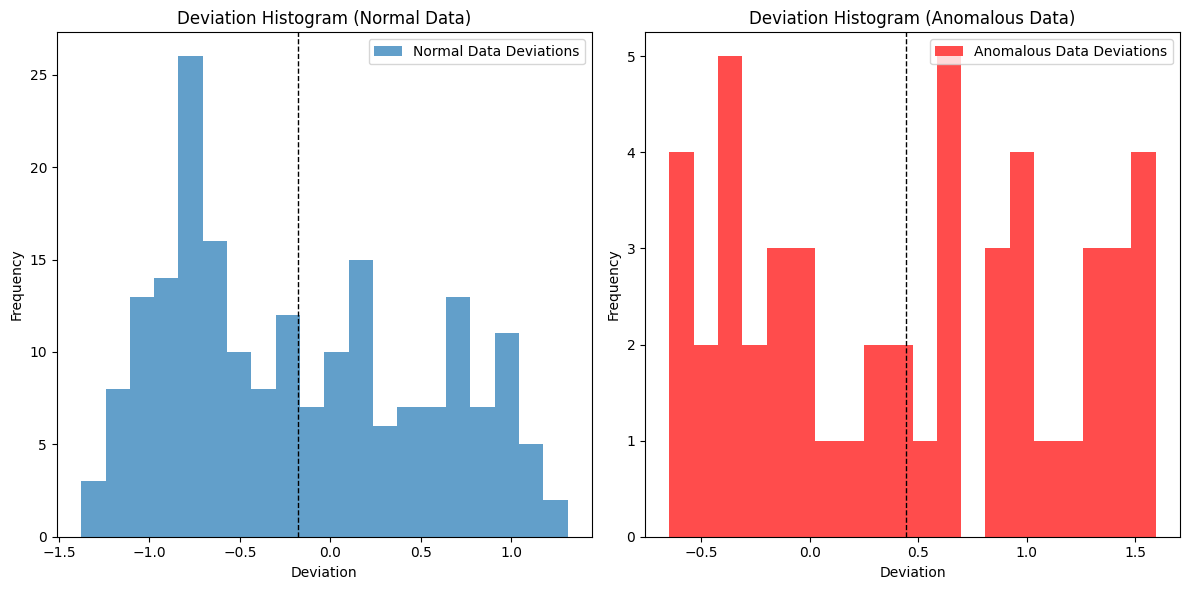

In [13]:
# Visualize results
plt.figure(figsize=(12, 6))

# Plot test data deviations
plt.subplot(1, 2, 1)
plt.hist(deviations, bins=20, alpha=0.7, label='Normal Data Deviations')
plt.axvline(np.mean(deviations), color='k', linestyle='dashed', linewidth=1)
plt.title("Deviation Histogram (Normal Data)")
plt.xlabel("Deviation")
plt.ylabel("Frequency")
plt.legend()

# Plot anomalous data deviations
plt.subplot(1, 2, 2)
plt.hist(anomalous_deviations, bins=20, alpha=0.7, color='r', label='Anomalous Data Deviations')
plt.axvline(np.mean(anomalous_deviations), color='k', linestyle='dashed', linewidth=1)
plt.title("Deviation Histogram (Anomalous Data)")
plt.xlabel("Deviation")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

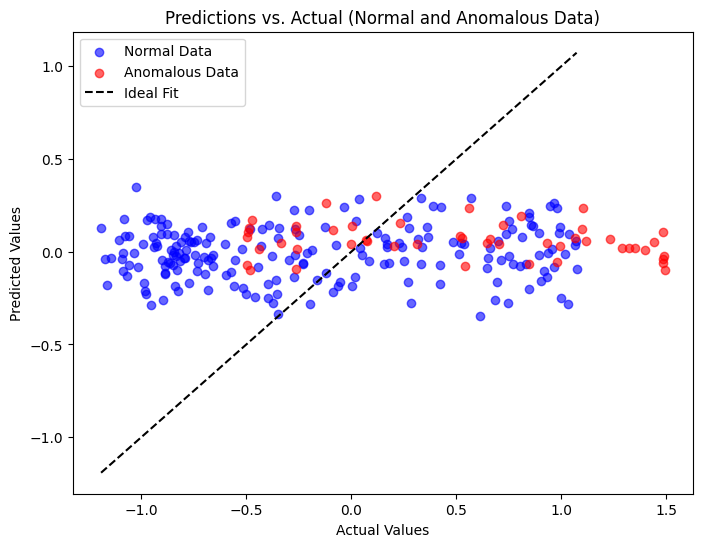

In [14]:
# Scatter plot of predictions vs actual for normal and anomalous data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Normal Data', c='blue')
plt.scatter(y_anomalous, y_anomalous_pred, alpha=0.6, label='Anomalous Data', c='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. Actual (Normal and Anomalous Data)")
plt.legend()
plt.show()